Importing Libraries

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

Checking Tensorflow Version

In [2]:
tf.__version__

'2.9.2'

Augmenting and giving the training dataset

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   brightness_range=(0.1, 0.9),
                                   channel_shift_range=150.0,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory("/Users/namanvasudeva/Downloads/train 4/train",
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')

Found 2604 images belonging to 4 classes.


Setting Path for Test data

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory("/Users/namanvasudeva/Downloads/train 4/test",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 296 images belonging to 4 classes.


Setting model for sequential data

In [5]:
cnn = tf.keras.models.Sequential()

Metal device set to: Apple M1


2022-08-14 23:19:18.931019: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-14 23:19:18.931189: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Adding layers to CNN Model

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [11]:
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))

Using the optimizer adam and categorical crossentropy for loss

In [12]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Running 50 Epochs to train CNN Model

In [13]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50


2022-08-14 23:19:19.155453: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-14 23:19:19.367821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


82/82 [==============================] - ETA: 0s - loss: 1.1454 - accuracy: 0.4305

2022-08-14 23:19:26.329371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


82/82 [==============================] - 8s 89ms/step - loss: 1.1454 - accuracy: 0.4305 - val_loss: 6.7802 - val_accuracy: 0.4155
Epoch 2/50
82/82 [==============================] - 7s 86ms/step - loss: 0.9059 - accuracy: 0.5326 - val_loss: 6.7138 - val_accuracy: 0.3851
Epoch 3/50
82/82 [==============================] - 7s 86ms/step - loss: 0.8908 - accuracy: 0.5476 - val_loss: 7.8924 - val_accuracy: 0.4189
Epoch 4/50
82/82 [==============================] - 7s 85ms/step - loss: 0.8045 - accuracy: 0.5895 - val_loss: 9.3905 - val_accuracy: 0.3818
Epoch 5/50
82/82 [==============================] - 7s 84ms/step - loss: 0.7850 - accuracy: 0.5868 - val_loss: 8.0229 - val_accuracy: 0.4730
Epoch 6/50
82/82 [==============================] - 7s 81ms/step - loss: 0.7630 - accuracy: 0.6198 - val_loss: 9.3162 - val_accuracy: 0.4088
Epoch 7/50
82/82 [==============================] - 7s 83ms/step - loss: 0.7058 - accuracy: 0.6313 - val_loss: 9.5298 - val_accuracy: 0.4426
Epoch 8/50
82/82 [======

Displaying the test image

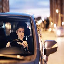

In [14]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img("/Users/namanvasudeva/Downloads/train 4/Predict/images.jpeg", target_size = (64, 64))
test_image







Running the loop for checking whether the image is of an alert driver or a drowsy one

In [20]:
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = image.load_img("/Users/namanvasudeva/Downloads/train 4/Predict/images.jpeg" , target_size = (64, 64))


test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)


result = cnn.predict(test_image)

result=result.astype(int)
Y=training_set.class_indices
j=0
i = 0
while i < 3:
    
    if result[0][i] == 1:
        break
    i=i+1
print(i)
j=i
if j == 0:
 prediction = 'Drowsy'
    
elif j == 1:
 prediction = 'Alert'
elif j == 2:
 prediction = 'Alert'
elif j == 3:
 prediction = 'Drowsy'


1/1 [==============================] - 0s 12ms/step
2


Predicting the State of the driver

In [21]:
print(prediction)

Alert


Displaying another image to check the algorithm

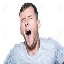

In [22]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img("/Users/namanvasudeva/Downloads/train 4/Predict/images-4.jpeg", target_size = (64, 64))
test_image







Running the loop for checking whether the image is of an alert driver or a drowsy one

In [23]:
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = image.load_img("/Users/namanvasudeva/Downloads/train 4/Predict/images-4.jpeg" , target_size = (64, 64))


test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)


result = cnn.predict(test_image)

result=result.astype(int)
Y=training_set.class_indices
j=0
i = 0
while i < 3:
    
    if result[0][i] == 1:
        break
    i=i+1
print(i)
j=i
if j == 0:
 prediction = 'Drowsy'
    
elif j == 1:
 prediction = 'Alert'
elif j == 2:
 prediction = 'Alert'
elif j == 3:
 prediction = 'Drowsy'

1/1 [==============================] - 0s 14ms/step
3


Pridicting the driver state for the image

In [24]:
print(prediction)

Drowsy


As checked for two images, the algorithm is able to correctly predict the state of driver drowsiness